In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2011-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864281
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078656
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131254
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214127
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205874


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [4]:
df.reset_index(inplace=True)

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864281
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078656
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131254
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214127
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205874


In [6]:
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

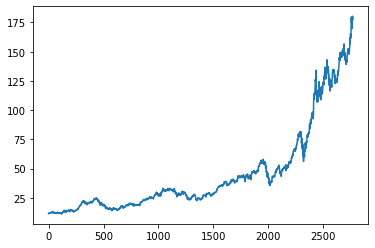

In [7]:
plt.plot(df.Close)

In [8]:
avg100 = df.Close.rolling(100).mean()

In [9]:
avg100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2765    153.3444
2766    153.6667
2767    153.9991
2768    154.3202
2769    154.6399
Name: Close, Length: 2770, dtype: float64

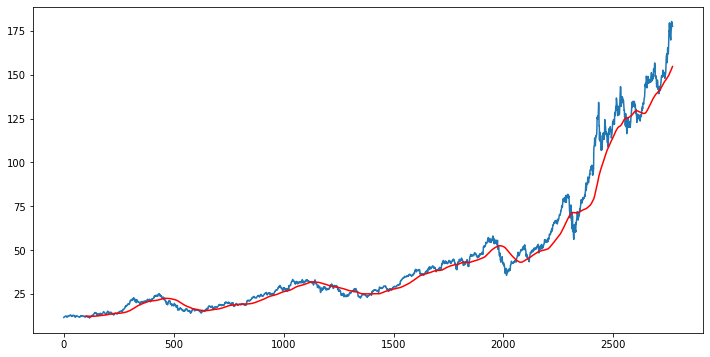

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(avg100, 'r')

In [11]:
avg200 = df.Close.rolling(200).mean()

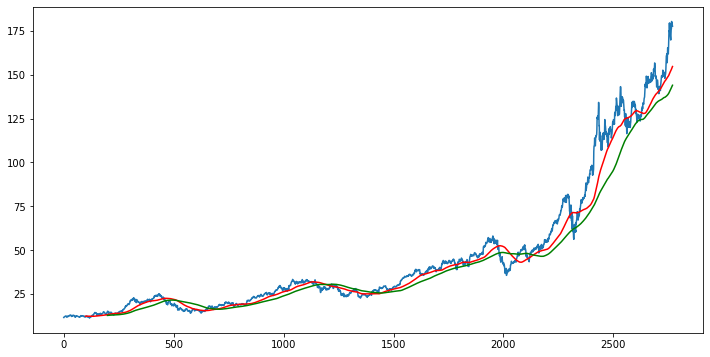

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(avg100, 'r')
plt.plot(avg200, 'g')

In [13]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

data_train.shape

(1938, 1)

In [14]:
data_test.shape

(832, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[0.00564215],
       [0.01110504],
       [0.01244545],
       ...,
       [0.94528523],
       [0.97539747],
       [0.96023227]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_train_scaled.shape[0]):
    x_train.append(data_train_scaled[i-100:i])
    y_train.append(data_train_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
58/58 [==============================] - 18s 229ms/step - loss: 0.0326
Epoch 2/100
58/58 [==============================] - 12s 215ms/step - loss: 0.0064
Epoch 3/100
58/58 [==============================] - 13s 219ms/step - loss: 0.0052
Epoch 4/100
58/58 [==============================] - 13s 217ms/step - loss: 0.0043
Epoch 5/100
58/58 [==============================] - 12s 213ms/step - loss: 0.0053
Epoch 6/100
58/58 [==============================] - 12s 206ms/step - loss: 0.0045
Epoch 7/100
58/58 [==============================] - 13s 217ms/step - loss: 0.0041
Epoch 8/100
58/58 [==============================] - 13s 219ms/step - loss: 0.0043
Epoch 9/100
58/58 [==============================] - 13s 219ms/step - loss: 0.0041
Epoch 10/100
58/58 [==============================] - 13s 218ms/step - loss: 0.0034
Epoch 11/100
58/58 [==============================] - 13s 218ms/step - loss: 0.0033
Epoch 12/100
58/58 [==============================] - 13s 218ms/step - loss: 0.0037
E

In [26]:
model.save('LSTM_model.h5')

In [28]:
data_test.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [29]:
prev_100_days = data_train.tail(100)

In [30]:
test_df = prev_100_days.append(data_test, ignore_index=True)
test_df.head()

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [31]:
test_data_scaled = scaler.fit_transform(test_df)

In [32]:
test_data_scaled.shape

(932, 1)

In [58]:
x_test = []
y_test = []

for i in range(100, test_data_scaled.shape[0]):
    x_test.append(test_data_scaled[i-100:i])
    y_test.append(test_data_scaled[i,0])
    
x_test, y_test = np.array(x_train), np.array(y_train)

In [36]:
print(x_test.shape)
print(y_test.shape)

(1838, 100, 1)
(1838,)


In [59]:
y_predictions = model.predict(x_test)
scaler.scale_

array([0.00690691])

In [60]:
scf = 1/0.00690691
y_predictions = y_predictions*scf
y_test = y_test*scf

In [61]:
y_predictions

array([[ 16.333397],
       [ 16.25852 ],
       [ 16.190634],
       ...,
       [135.46379 ],
       [134.84294 ],
       [134.36517 ]], dtype=float32)

In [62]:
y_test

array([  2.42131473,   2.22048002,   2.4923973 , ..., 136.86080041,
       141.22052753, 139.02487052])

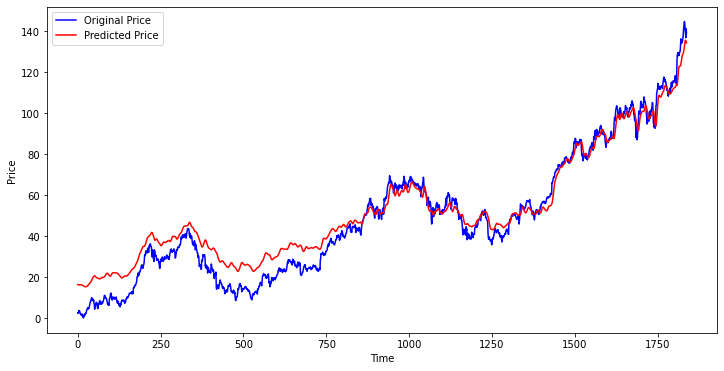

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predictions, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()